In [31]:
import pandas as pd
import numpy as np
from utils.data_process import input_process, res_process
from utils.search import return_res
from utils.plot import plotly_plot
# from utils.algo.calculation import *
from datetime import date
from os import walk
import re
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
def min_max_scalar(arr):
    process_func = MinMaxScaler()
    arr_reshape = arr.reshape(-1,1)
    res = process_func.fit_transform(arr_reshape)
    return res.flatten()

In [32]:
def arr2poly_coef(arr):
    x = np.array([i for i in range(len(arr))])
    res = np.polyfit(x, arr, len(arr))
    return  res

def rms(x):
    return np.sqrt(np.mean(x**2))

def poly2on(poly_coeff):
    x = np.array([i for i in range(len(poly_coeff))])
    orth_coef = np.polynomial.legendre.poly2leg(poly_coeff[::-1])
    # leg_norms = np.array([rms(np.polynomial.Legendre(v)(x)) for v in np.eye(len(poly_coeff))])
    # return orth_coef*leg_norms
    return orth_coef

In [33]:
Ticker = '2317TW'
start_date = "2014-12-05"
end_date = "2015-01-12"
df = pd.read_csv(r"./data/{}.csv".format(Ticker))
s, e = input_process.DateIndexMap(df, start_date), input_process.DateIndexMap(df, end_date)

In [34]:
y = min_max_scalar(np.array(df['Close'][s:e]))
x = np.array([i for i in range(len(y))])

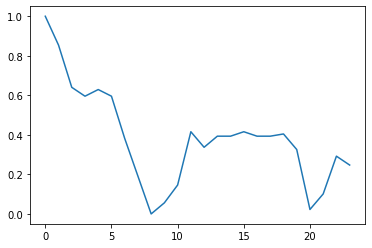

In [35]:
plt.plot(x,y)

In [48]:
p = np.polynomial.legendre.Legendre(poly2on(arr2poly_coef(y)))

In [45]:
p = np.polynomial.legendre.Legendre(poly2on(arr2poly_coef(y))/np.linalg.norm(poly2on(arr2poly_coef(y))))

In [46]:
y_pred = np.array([p(i) for i in x])

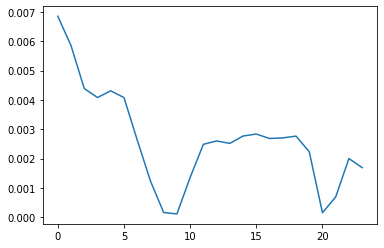

In [49]:
plt.plot(x, y_pred)

In [74]:
def update_graph_shape_res(Ticker, start_date, end_date, step=10):

    # read data
    df = pd.read_csv(r"./data/{}.csv".format(Ticker))

    # transform date to index
    s, e = input_process.DateIndexMap(df, start_date), input_process.DateIndexMap(df, end_date)

    # search and return res
    search_res = return_res.get_sim_res(df, s, e, 'shape_d') # a:b
    

    # get res start and end
    s_res, e_res = res_process.range_2_num(search_res)

    return(
        plotly_plot.plot(df, s = s_res, e = e_res, step = step)
    )

In [76]:
update_graph_shape_res(Ticker=Ticker, start_date = start_date, end_date= end_date)

100%|██████████| 3562/3562 [00:18<00:00, 189.39it/s]


In [38]:
input_process.IndexDateMap(df, 104)

'2008-06-09'

In [70]:
input_process.IndexDateMap(df, start_date)

KeyError: '2010-05-09'